In [1]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import (
                          Model,
                          )
from keras.layers import (
                          Activation,
                          Conv2D,
                          Dense,
                          Flatten,
                          Input,
                          MaxPooling2D,
                          Dropout,
                          )
from keras import optimizers,losses
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
X = np.linspace(-1, 1, 200)  # X = array([-1,-0.98994975, ...,1]) 200 elements
np.random.shuffle(X)    # 将数据集随机化
# Y = array([1.448295, ...,2.52580387])  由 y=0.5*x+2 再加上200 elements 正态分布偏移量构成
# numpy.random.normal(loc=0.0, scale=1.0, size=None) 
# loc: 此概率分布的均值，（对应着整个分布的中心centre）scale: 此概率分布的标准差（对应于分布的宽度，scale越大越矮胖，scale越小，越瘦高）size: 输出的shape，默认为None，只输出一个值
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, )) # 假设我们真实模型为：Y=0.5X+2

In [3]:
print(X)

[-0.75879397  0.39698492 -0.08542714 -0.86934673 -0.78894472 -0.80904523
 -0.87939698  0.26633166 -0.98994975 -0.07537688 -0.9798995   0.41708543
 -0.35678392 -0.96984925  0.08542714  0.6080402  -0.45728643 -0.5678392
 -0.01507538  0.12562814  0.94974874 -0.93969849  0.83919598  0.5678392
  0.59798995  0.06532663 -0.85929648  0.63819095  0.5879397   0.18592965
 -0.91959799 -0.83919598  1.         -0.77889447 -0.59798995 -0.53768844
 -0.09547739  0.2160804   0.27638191 -0.94974874 -0.02512563 -0.5879397
 -0.76884422  0.98994975 -0.2160804   0.20603015  0.42713568  0.79899497
 -0.44723618  0.85929648 -0.36683417 -1.          0.34673367 -0.11557789
  0.30653266 -0.22613065 -0.48743719  0.92964824 -0.31658291  0.77889447
 -0.57788945  0.96984925 -0.27638191  0.74874372 -0.30653266 -0.05527638
 -0.33668342 -0.88944724  0.68844221  0.22613065  0.15577889 -0.15577889
  0.54773869  0.51758794  0.52763819 -0.72864322 -0.84924623  0.46733668
 -0.69849246 -0.04522613  0.11557789  0.71859296  0.28

In [4]:
print(Y)

[1.51755715 2.25195084 1.94650889 1.65449661 1.58916084 1.58309934
 1.54202069 2.11562123 1.41534408 1.94547172 1.55412111 2.24460663
 1.85508501 1.55887682 2.07440148 2.39815407 1.74986684 1.71198072
 1.97082073 2.01377063 2.43041398 1.64880389 2.41572437 2.3780321
 2.273228   1.97082644 1.51328538 2.23987714 2.26733858 2.1608151
 1.54402437 1.57937895 2.41825566 1.53106382 1.71923202 1.75275675
 1.93165475 2.11977807 2.15894585 1.55958914 1.96220383 1.63364829
 1.50707331 2.52839749 1.8712701  2.11982793 2.20443875 2.46638093
 1.74096925 2.55635057 1.81338229 1.46128718 2.18990589 1.9223451
 2.24056104 1.8608688  1.78501564 2.49959214 1.88484244 2.37801582
 1.59620746 2.48345086 1.78940934 2.34738147 1.78726732 1.96100671
 1.87097561 1.55658262 2.34359863 2.13774582 2.1149484  1.87357276
 2.32679138 2.21298548 2.2262304  1.55545341 1.63408549 2.31491136
 1.67408171 1.96156885 1.99479884 2.33160681 2.17429934 2.07815468
 1.91503904 2.20795818 2.13157362 2.39259459 2.24362629 1.8111243

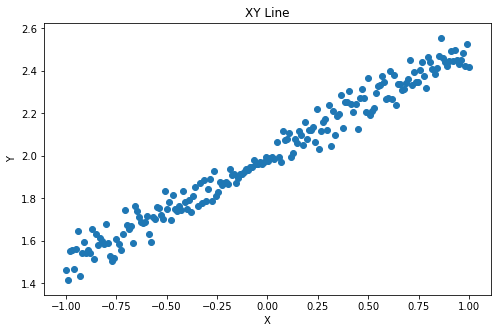

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(X,Y)
plt.title('XY Line')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

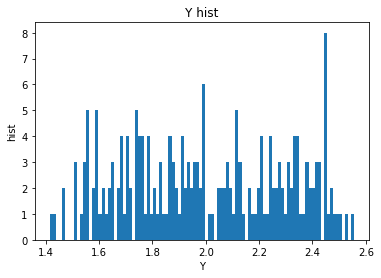

In [6]:
plt.hist(Y,bins=100)
plt.title('Y hist')
plt.ylabel('hist')
plt.xlabel('Y')
plt.show()

In [7]:
data = {'X':X.tolist(),'Y':Y.tolist()}
# create dataframe from dictionary
df = pd.DataFrame(data)

In [8]:
print(df)

            X         Y
0   -0.758794  1.517557
1    0.396985  2.251951
2   -0.085427  1.946509
3   -0.869347  1.654497
4   -0.788945  1.589161
..        ...       ...
195  0.497487  2.368717
196  0.105528  2.107438
197  0.869347  2.461598
198 -0.175879  1.911565
199 -0.266332  1.928316

[200 rows x 2 columns]


In [27]:
df.to_csv('xy_data.csv', sep=',', encoding='utf-8', index=False)

In [9]:
df = pd.read_csv('xy_data.csv')

In [10]:
print(df)

            X         Y
0   -0.346734  1.858089
1    0.929648  2.424496
2   -0.095477  1.956080
3   -0.919598  1.492141
4   -0.417085  1.858049
..        ...       ...
195 -0.537688  1.745308
196  0.236181  2.100418
197  0.989950  2.414130
198 -0.025126  1.955297
199 -0.899497  1.526798

[200 rows x 2 columns]


In [11]:
train_x = df.iloc[:,0]
train_y = df.iloc[:,1]
print(train_x)
print(train_y)

0     -0.346734
1      0.929648
2     -0.095477
3     -0.919598
4     -0.417085
         ...   
195   -0.537688
196    0.236181
197    0.989950
198   -0.025126
199   -0.899497
Name: X, Length: 200, dtype: float64
0      1.858089
1      2.424496
2      1.956080
3      1.492141
4      1.858049
         ...   
195    1.745308
196    2.100418
197    2.414130
198    1.955297
199    1.526798
Name: Y, Length: 200, dtype: float64


In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3) # 70% training and 30% test
print('shape of X=',X_train.shape)
print('shape of X test=',X_test.shape)

shape of X= (140,)
shape of X test= (60,)


In [14]:
epochs = 200
batch_size = 32
# 定义一个model，
model = Sequential () # Keras有两种类型的模型，序贯模型（Sequential）和函数式模型
                      # 比较常用的是Sequential，它是单输入单输出的
model.add(Dense(output_dim=1, input_dim=1)) # 通过add()方法一层层添加模型
                                            # Dense是全连接层，第一层需要定义输入，
                                            # 第二层无需指定输入，一般第二层把第一层的输出作为输入

# 定义完模型就需要训练了，不过训练之前我们需要指定一些训练参数
# 通过compile()方法选择损失函数和优化器
# 这里我们用均方误差作为损失函数，随机梯度下降作为优化方法
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
mse = losses.mse
model.compile(loss=mse, optimizer=sgd)
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


Train on 140 samples, validate on 60 samples
Epoch 1/200
140/140 [==============================] - 0s 382us/step - loss: 4.3932 - val_loss: 4.3307
Epoch 2/200
140/140 [==============================] - 0s 33us/step - loss: 4.0472 - val_loss: 3.8686
Epoch 3/200
140/140 [==============================] - 0s 35us/step - loss: 3.5742 - val_loss: 3.3375
Epoch 4/200
140/140 [==============================] - 0s 34us/step - loss: 3.0639 - val_loss: 2.8198
Epoch 5/200
140/140 [==============================] - 0s 35us/step - loss: 2.5719 - val_loss: 2.3535
Epoch 6/200
140/140 [==============================] - 0s 35us/step - loss: 2.1464 - val_loss: 1.9447
Epoch 7/200
140/140 [==============================] - 0s 32us/step - loss: 1.7637 - val_loss: 1.6029
Epoch 8/200
140/140 [==============================] - 0s 31us/step - loss: 1.4576 - val_loss: 1.3156
Epoch 9/200
140/140 [==============================] - 0s 32us/step - loss: 1.2018 - val_loss: 1.0803
Epoch 10/200
140/140 [==============

140/140 [==============================] - 0s 31us/step - loss: 0.0040 - val_loss: 0.0042
Epoch 81/200
140/140 [==============================] - 0s 33us/step - loss: 0.0039 - val_loss: 0.0041
Epoch 82/200
140/140 [==============================] - 0s 32us/step - loss: 0.0038 - val_loss: 0.0041
Epoch 83/200
140/140 [==============================] - 0s 36us/step - loss: 0.0037 - val_loss: 0.0040
Epoch 84/200
140/140 [==============================] - 0s 38us/step - loss: 0.0036 - val_loss: 0.0039
Epoch 85/200
140/140 [==============================] - 0s 34us/step - loss: 0.0035 - val_loss: 0.0038
Epoch 86/200
140/140 [==============================] - 0s 32us/step - loss: 0.0034 - val_loss: 0.0038
Epoch 87/200
140/140 [==============================] - 0s 32us/step - loss: 0.0034 - val_loss: 0.0037
Epoch 88/200
140/140 [==============================] - 0s 33us/step - loss: 0.0033 - val_loss: 0.0037
Epoch 89/200
140/140 [==============================] - 0s 31us/step - loss: 0.0033 - 

140/140 [==============================] - 0s 30us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 160/200
140/140 [==============================] - 0s 30us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 161/200
140/140 [==============================] - 0s 35us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 162/200
140/140 [==============================] - 0s 33us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 163/200
140/140 [==============================] - 0s 31us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 164/200
140/140 [==============================] - 0s 32us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 165/200
140/140 [==============================] - 0s 32us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 166/200
140/140 [==============================] - 0s 30us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 167/200
140/140 [==============================] - 0s 32us/step - loss: 0.0025 - val_loss: 0.0030
Epoch 168/200
140/140 [==============================] - 0s 33us/step - loss: 

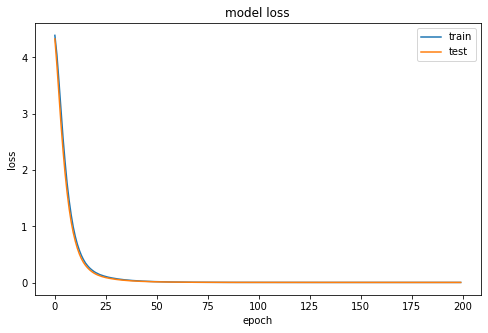

In [15]:
# summarize history for loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [16]:
# 测试训练好的模型
print('\nTesting ------------')
cost = model.evaluate(X_test, y_test, batch_size=32)
print('test cost:', cost)
W, b = model.layers[0].get_weights()    # 查看训练出的网络参数
                                        # 由于我们网络只有一层，且每次训练的输入只有一个，输出只有一个. 因此 W 为一个二维数组[[0.4922711]]，b 为一维数组[1.9995022]
                                        # 因此第一层训练出Y=WX+B这个模型，其中W,b为训练出的参数
print('Weights=', W[0][0], '\nbiases=', b[0])



Testing ------------
60/60 [==============================] - 0s 27us/step
test cost: 0.0030077410706629355
Weights= 0.5020349 
biases= 1.9965746


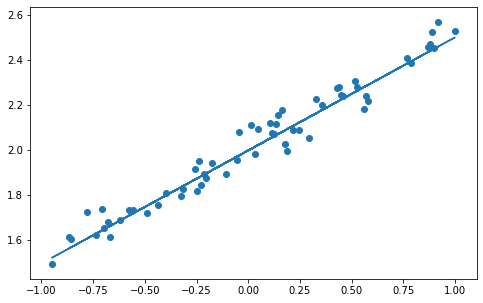

In [17]:
# plotting the prediction
plt.figure(figsize=(8,5))
Y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred)  # plot X_test,Y_pred 
plt.show()